# Some Initialisation

In [1]:
#
#  Imports and base Data Version 1.0
#

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from mpl_toolkits.basemap import Basemap
from sklearn.cluster import DBSCAN


data = pd.read_csv(r'solution_2.csv')

locations_us = [[row["latitude"], row["longitude"]] for key, row in data.iterrows() if  row["countrycode"] == 'US' ]
locations = [[row["latitude"], row["longitude"]] for key, row in data.iterrows() if  not isinstance(row["countrycode"], float) ]

helper_colors = ['indigo', 'lime', 'khaki', 'grey', 'lightblue', 'yellow', 'red']



# Base Information


Headlines:  650
Countries:  8
Cities:  612
  US Cities:  309
Found Locations:  612



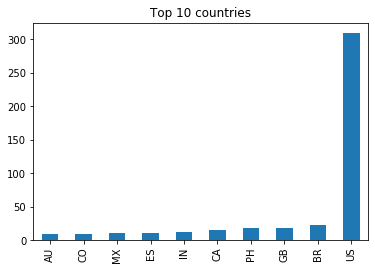

In [2]:

print("")
print("Headlines: ", data['headline'].count())
print("Countries: ", data['countries'].count())
print("Cities: ", data['cities'].count())
print("  US Cities: ", len(locations_us))
print("Found Locations: ", data['countrycode'].count())
print("")

data['countrycode'].value_counts().sort_values().tail(10).plot.bar(title="Top 10 countries")

   

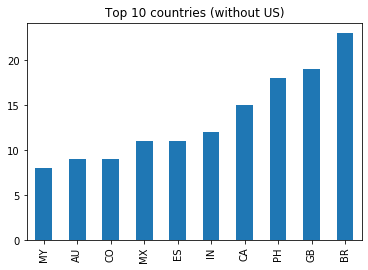

In [3]:
data['countrycode'].value_counts().sort_values().tail(11).head(10).plot.bar(title="Top 10 countries (without US)")

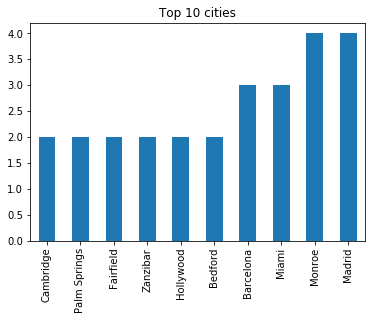

In [4]:
data['cities'].value_counts().sort_values().tail(10).plot.bar(title="Top 10 cities")

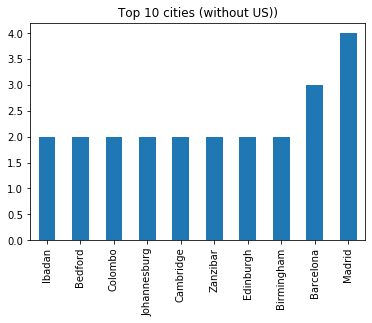

In [5]:

pd.Series([row["cities"] for idx,row in data.iterrows() if row["countrycode"]!="US"]).value_counts().sort_values().tail(10).plot.bar(title="Top 10 cities (without US))")


# US K-Means

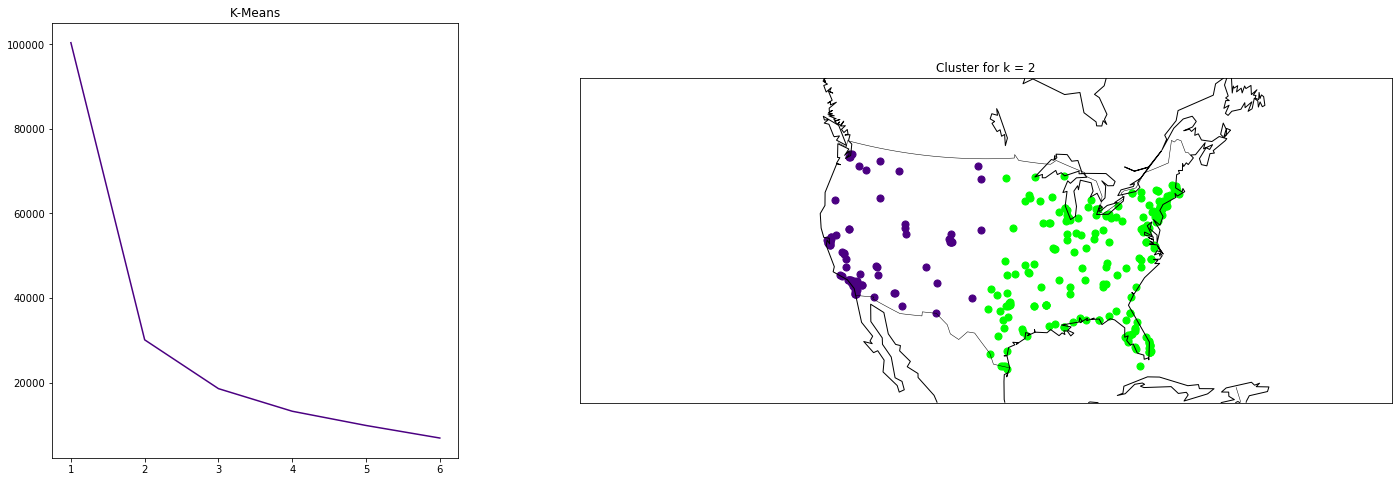

In [6]:

# Probably 7, because of the Continents 
k_values = range(1, 7)
inertia_values_us = [KMeans(k).fit(locations_us).inertia_ for k in k_values]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,8),  gridspec_kw={'width_ratios': [2, 4]})

ax1.set_title('K-Means')
ax2.set_title('Cluster for k = 2')

ax1.plot(k_values, inertia_values_us, helper_colors[0])

map_plotter = Basemap(width=10000000,height=4000000,projection='lcc', resolution='c',lat_0=40,lon_0=-100)


location_clusters = KMeans(2).fit_predict(locations_us)

colors = [helper_colors[cluster] for cluster in  location_clusters]
    
for i in range(len(locations_us)):
    color = colors[i]
    lat = locations_us[i][0]
    long = locations_us[i][1]

    map_plotter.scatter([long], [lat], color=color, latlon=True, s=50)
    
map_plotter.drawcoastlines()
map_plotter.drawcountries()
plt.show()
print("")


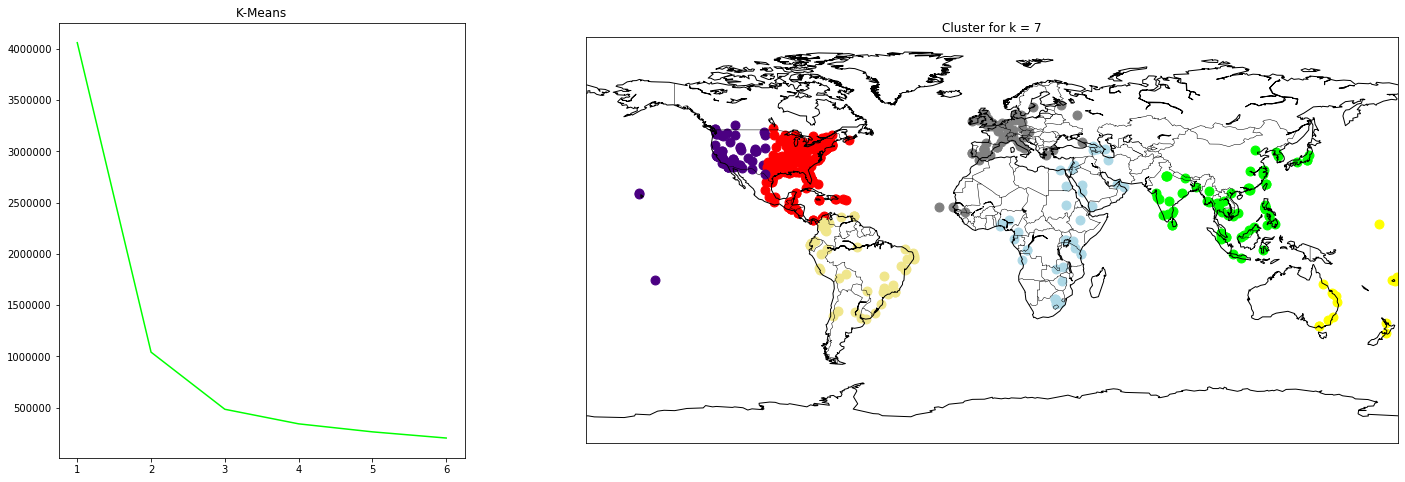

In [7]:

map_plotter = Basemap()

k_values = range(1, 7)
inertia_values = [KMeans(k).fit(locations).inertia_ for k in k_values]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,8),  gridspec_kw={'width_ratios': [2, 4]})

ax1.set_title('K-Means')
ax2.set_title('Cluster for k = 7')

ax1.plot(k_values, inertia_values, helper_colors[1])


location_clusters = KMeans(7).fit_predict(locations)

colors = [helper_colors[cluster] for cluster in  location_clusters]

for i in range(len(locations)):
    color = colors[i]
    lat = locations[i][0]
    long = locations[i][1]

    map_plotter.scatter([long], [lat], color=color, latlon=True, s=80)
    
map_plotter.drawcoastlines()
map_plotter.drawcountries()
plt.show()


# Cluster Selection

Since you have to eyeball the clusters, this code shows maps, from the K-Mean "3" - elbow to the continent count of 7

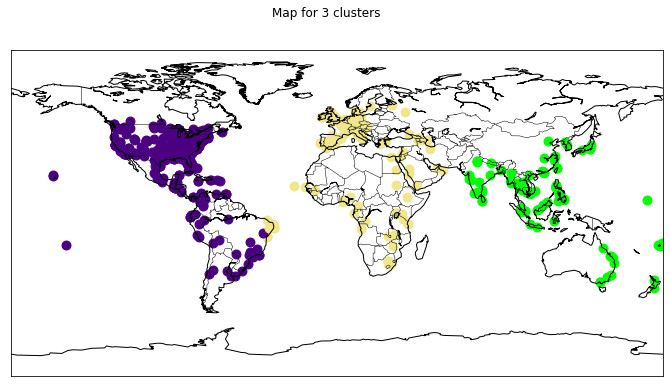

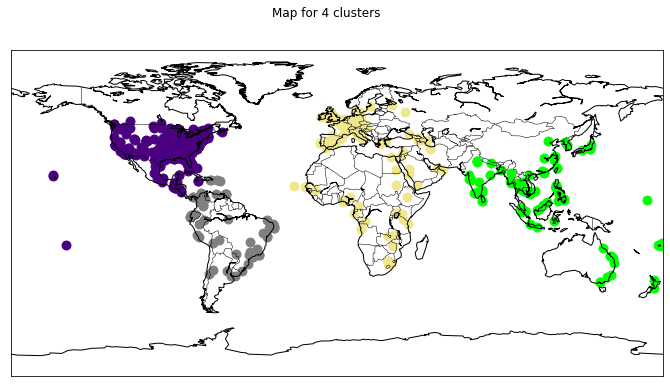

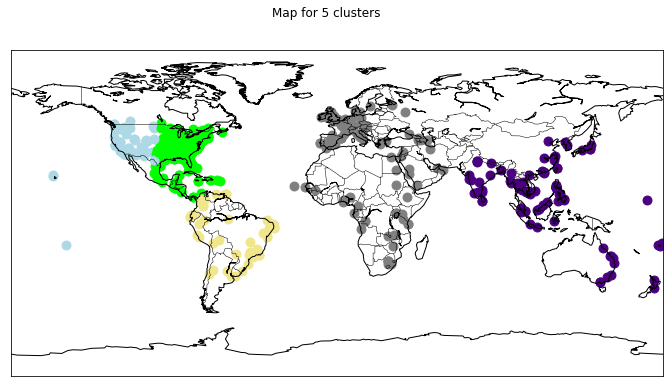

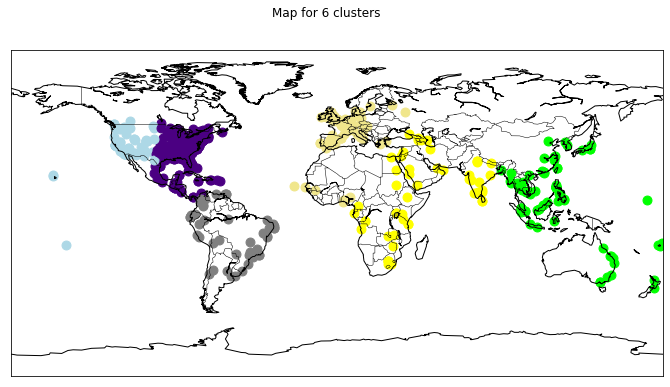

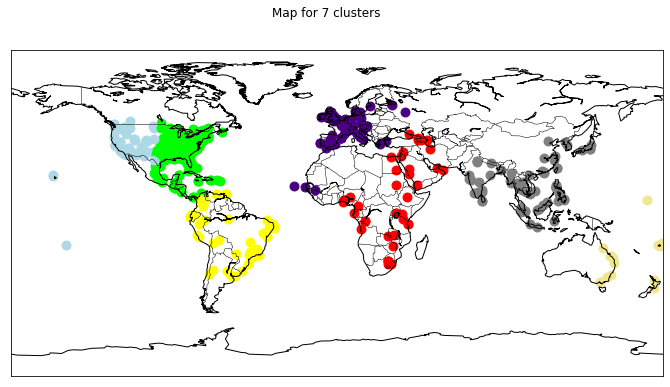

In [8]:

for map in range(3, 8):
    fig = plt.figure(figsize=(12, 6))
    
    fig.suptitle('Map for %s clusters' % map )
    location_clusters = KMeans(map).fit_predict(locations)
    colors = [helper_colors[cluster] for cluster in  location_clusters]
    map_plotter = Basemap()

    for i in range(len(locations)):
        color = colors[i]
        lat = locations[i][0]
        long = locations[i][1]

        map_plotter.scatter([long], [lat], color=color, latlon=True, s=80)

    
    map_plotter.drawcoastlines()
    map_plotter.drawcountries()
    plt.show()



# DBSCAN

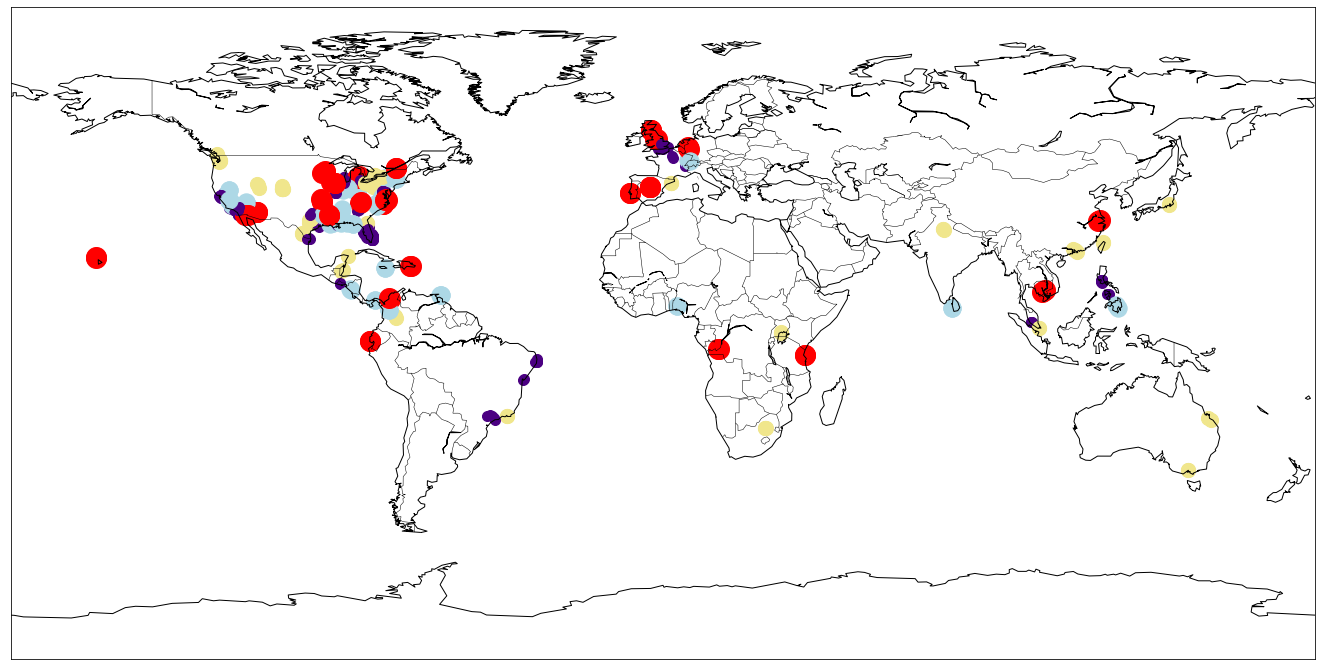

In [9]:


epsilon = 1
min_points = 2
fig = plt.figure(figsize=(24, 12))
cluster_model = DBSCAN(eps=epsilon, min_samples=min_points)
clusters = cluster_model.fit_predict(locations)

max = np.amax(clusters)
counts = [cluster for cluster in clusters]

map_plotter = Basemap()

for i in range(len(locations)):
    count = counts[i]
    if count > 0:
        if count < (max/4):
            color = helper_colors[0]
            size = 100
        elif count < (max/2):
            color = helper_colors[2]
            size = 200
        elif count < (max*3/4):
            color = helper_colors[4]
            size = 300
        else:
            color = helper_colors[6]
            size = 400
            
        lat = locations[i][0]
        long = locations[i][1]

        map_plotter.scatter([long], [lat], color=color, latlon=True, s=size)

map_plotter.drawcoastlines()
map_plotter.drawcountries()
plt.show()
